Connecting with the Google Drive for mounting the necessary files

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importing Dependancies

**NumPy**        - for numerical processing

**Pandas**       - for easy data wrangling

**Matplotlib**   - for data representation

**SciKitlearn**  - for utilizing the Linear Regression model and factors related to it



In [2]:
import numpy as np  # numerical computing
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #visualization
%matplotlib inline
import seaborn as sns #modern visualization
from sklearn.model_selection import train_test_split#for training and testing our model
from sklearn.linear_model import LinearRegression#ML algorithm
from sklearn import metrics
from sklearn.metrics import r2_score


# Data preprocessing
 - Importing and initializing the dataframes
 - Cleaning the dataframes of each year
 - Preparing the data as needed for system
  

In [3]:
fifa15 = pd.read_csv('/content/drive/MyDrive/BE Project/players_15.csv')
pd.set_option("display.max_columns",None)
fifa15.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,league_name,league_rank,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,27,1987-06-24,169,67,Argentina,FC Barcelona,Spain Primera Division,1.0,93,95,100500000,550000,CF,Left,5,3,4,Medium/Low,Normal,Yes,NaN,"#Speedster, #Dribbler, #FK Specialist, #Acroba...",CF,10.0,NaN,2004-07-01,2018.0,CF,10.0,93.0,89.0,86.0,96.0,27.0,63.0,NaN,NaN,NaN,NaN,NaN,NaN,"Finesse Shot, Speed Dribbler (AI), One Club Pl...",84,94,71,89,85,96,89,90,76,96,96,90,94,94,95,80,73,77,60,88,48,22,92,90,76,NaN,25,21,20,6,11,15,14,8,89+3,89+3,89+3,92+3,90+3,90+3,90+3,92+3,92+3,92+3,92+3,90+3,79+3,79+3,79+3,90+3,62+3,62+3,62+3,62+3,62+3,54+3,45+3,45+3,45+3,54+3
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,29,1985-02-05,185,80,Portugal,Real Madrid,Spain Primera Division,1.0,92,92,79000000,375000,"LW, LM",Right,5,4,5,High/Low,Normal,Yes,NaN,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2009-07-01,2018.0,LW,7.0,93.0,93.0,81.0,91.0,32.0,79.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Flair, Long Shot Taker (AI), ...",83,95,86,82,87,93,88,79,72,92,91,94,93,90,63,94,94,89,79,93,63,24,91,81,85,NaN,22,31,23,7,11,15,14,11,91+1,91+1,91+1,89+3,91+1,91+1,91+1,89+3,89+3,89+3,89+3,87+3,77+3,77+3,77+3,87+3,63+3,63+3,63+3,63+3,63+3,57+3,52+3,52+3,52+3,57+3
2,9014,https://sofifa.com/player/9014/arjen-robben/15...,A. Robben,Arjen Robben,30,1984-01-23,180,80,Netherlands,FC Bayern München,German 1. Bundesliga,1.0,90,90,54500000,275000,"RM, LM, RW",Left,5,2,4,High/Low,Normal,Yes,NaN,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",SUB,10.0,NaN,2009-08-28,2017.0,RS,11.0,93.0,86.0,83.0,92.0,32.0,64.0,NaN,NaN,NaN,NaN,NaN,NaN,"Diver, Injury Prone, Avoids Using Weaker Foot,...",80,85,50,86,86,93,85,83,76,90,93,93,93,89,91,86,61,78,65,90,47,39,89,84,80,NaN,29,26,26,10,8,11,5,15,84+3,84+3,84+3,88+2,87+3,87+3,87+3,88+2,88+2,88+2,88+2,87+3,78+3,78+3,78+3,87+3,64+3,64+3,64+3,64+3,64+3,55+3,46+3,46+3,46+3,55+3
3,41236,https://sofifa.com/player/41236/zlatan-ibrahim...,Z. Ibrahimović,Zlatan Ibrahimović,32,1981-10-03,195,95,Sweden,Paris Saint-Germain,French Ligue 1,1.0,90,90,52500000,275000,ST,Right,5,4,4,Medium/Low,Normal,Yes,NaN,"#Poacher, #Aerial Threat, #Distance Shooter, #...",ST,10.0,NaN,2012-07-01,2016.0,ST,10.0,76.0,91.0,81.0,86.0,34.0,86.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Leadership, Flair, Long Shot ...",76,91,76,84,92,88,80,80,76,90,74,77,86,85,41,93,72,78,93,88,84,20,86,83,91,NaN,25,41,27,13,15,10,9,12,87+3,87+3,87+3,84+3,86+3,86+3,86+3,84+3,86+3,86+3,86+3,83+3,76+3,76+3,76+3,83+3,61+3,65+3,65+3,65+3,61+3,56+3,55+3,55+3,55+3,56+3
4,167495,https://sofifa.com/player/167495/manuel-neuer/...,M. Neuer,Manu

In [4]:
fifa15 = fifa15.dropna(axis=1, how='all')
fifa15.drop(fifa15.iloc[:, 78:], inplace = True, axis = 1)
fifa15.drop(['sofifa_id', 'player_url','long_name', 'dob','nationality', 'league_name', 'preferred_foot', 'international_reputation', 'weak_foot','skill_moves', 'work_rate', 'body_type', 'real_face', 'team_position','team_jersey_number','loaned_from','nation_position','nation_jersey_number','player_traits'], inplace = True, axis = 1)#sofifa_id, player_url,Long Name, DOB, Nationality, League name, 'preferred_foot', 'international_reputation', 'weak_foot','skill_moves', 'work_rate', 'body_type', 'real_face', 'team_position','team_jersey_number','loaned_from','nation_position','nation_jersey_number''player_traits'
fifa15.head()

<ipython-input-4-4bb3a19ec3df>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fifa15.drop(fifa15.iloc[:, 78:], inplace = True, axis = 1)
<ipython-input-4-4bb3a19ec3df>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fifa15.drop(['sofifa_id', 'player_url','long_name', 'dob','nationality', 'league_name', 'preferred_foot', 'international_reputation', 'weak_foot','skill_moves', 'work_rate', 'body_type', 'real_face', 'team_position','team_jersey_number','loaned_from','nation_position','nation_jersey_number','player_traits'], inplace = True, axis = 1)#sofifa_id, player_url,Long Name, DOB, Nationality, League name, 'prefer

,short_name,age,height_cm,weight_kg,club_name,league_rank,overall,potential,value_eur,wage_eur,player_positions,player_tags,joined,contract_valid_until,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,L. Messi,27,169,67,FC Barcelona,1.0,93,95,100500000,550000,CF,"#Speedster, #Dribbler, #FK Specialist, #Acroba...",2004-07-01,2018.0,93.0,89.0,86.0,96.0,27.0,63.0,NaN,NaN,NaN,NaN,NaN,NaN,84,94,71,89,85,96,89,90,76,96,96,90,94,94,95,80,73,77,60,88,48,22,92,90,76,25,21,20,6,11,15,14,8
1,Cristiano Ronaldo,29,185,80,Real Madrid,1.0,92,92,79000000,375000,"LW, LM","#Speedster, #Dribbler, #Distance Shooter, #Acr...",2009-07-01,2018.0,93.0,93.0,81.0,91.0,32.0,79.0,NaN,NaN,NaN,NaN,NaN,NaN,83,95,86,82,87,93,88,79,72,92,91,94,93,90,63,94,94,89,79,93,63,24,91,81,85,22,31,23,7,11,15,14,11
2,A. Robben,30,180,80,FC Bayern München,1.0,90,90,54500000,275000,"RM, LM, RW","#Speedster, #Dribbler, #Distance Shooter, #Acr...",2009-08-28,2017.0,93.0,86.0,83.0,92.0,32.0,64.0,NaN,NaN,NaN,NaN,NaN,NaN,80,85,50,86,86,93,85,83,76,90,93,93,93,89,91,86,61,78,65,90,47,39,89,84,80,29,26,26,10,8,11,5,15
3,Z. Ibrahimović,32,195,95,Paris Saint-Germain,1.0,90,90,52500000,275000,ST,"#Poacher, #Aerial Threat, #Distance Shooter, #...",2012-07-01,2016.0,76.0,91.0,81.0,86.0,34.0,86.0,NaN,NaN,NaN,NaN,NaN,NaN,76,91,76,84,92,88,80,80,76,90,74,77,86,85,41,93,72,78,93,88,84,20,86,83,91,25,41,27,13,15,10,9,12
4,M. Neuer,28,193,92,FC Bayern München,1.0,90,90,63500000,300000,GK,NaN,2011-07-01,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,85.0,92.0,86.0,60.0,90.0,25,25,25,42,25,25,25,25,41,31,58,61,43,89,35,42,78,44,83,25,29,30,25,20,37,25,25,25,87,85,92,90,86


In [5]:
year = []
for i in fifa15.iterrows():
  year.append('15')
fifa15['year'] = year
fifa15.columns.tolist()


['short_name',
 'age',
 'height_cm',
 'weight_kg',
 'club_name',
 'league_rank',
 'overall',
 'potential',
 'value_eur',
 'wage_eur',
 'player_positions',
 'player_tags',
 'joined',
 'contract_valid_until',
 'pace',
 'shooting',
 'passing',
 'dribbling',
 'defending',
 'physic',
 'gk_diving',
 'gk_handling',
 'gk_kicking',
 'gk_reflexes',
 'gk_speed',
 'gk_positioning',
 'attacking_crossing',
 'attacking_finishing',
 'attacking_heading_accuracy',
 'attacking_short_passing',
 'attacking_volleys',
 'skill_dribbling',
 'skill_curve',
 'skill_fk_accuracy',
 'skill_long_passing',
 'skill_ball_control',
 'movement_acceleration',
 'movement_sprint_speed',
 'movement_agility',
 'movement_reactions',
 'movement_balance',
 'power_shot_power',
 'power_jumping',
 'power_stamina',
 'power_strength',
 'power_long_shots',
 'mentality_aggression',
 'mentality_interceptions',
 'mentality_positioning',
 'mentality_vision',
 'mentality_penalties',
 'defending_marking',
 'defending_standing_tackle',
 'def

In [6]:
#EXPLODE FOR ALL POSITIONS
fifa15['player_positions'] = fifa15['player_positions'].str.split(', ')
fifa15 = fifa15.explode('player_positions')
fifa15.sort_values(by = 'player_positions', ascending = True, inplace=True)
fifa15.reset_index(inplace = True, drop = True)
fifa15positions=fifa15
fifa15.player_positions.value_counts()

CM     3303
CB     3272
ST     2979
CDM    2244
LM     2204
RM     2095
CAM    2041
RB     2016
LB     1869
GK     1775
RW      911
LW      839
CF      667
LWB     100
RWB      82
Name: player_positions, dtype: int64

- **Co-Relation Matrix of the datasets**

<ipython-input-7-e4e9911103b0>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(fifa15.corr(method = 'spearman'),cmap ="viridis", ax=ax, annot=True, linewidths=.2 )


<Axes: >

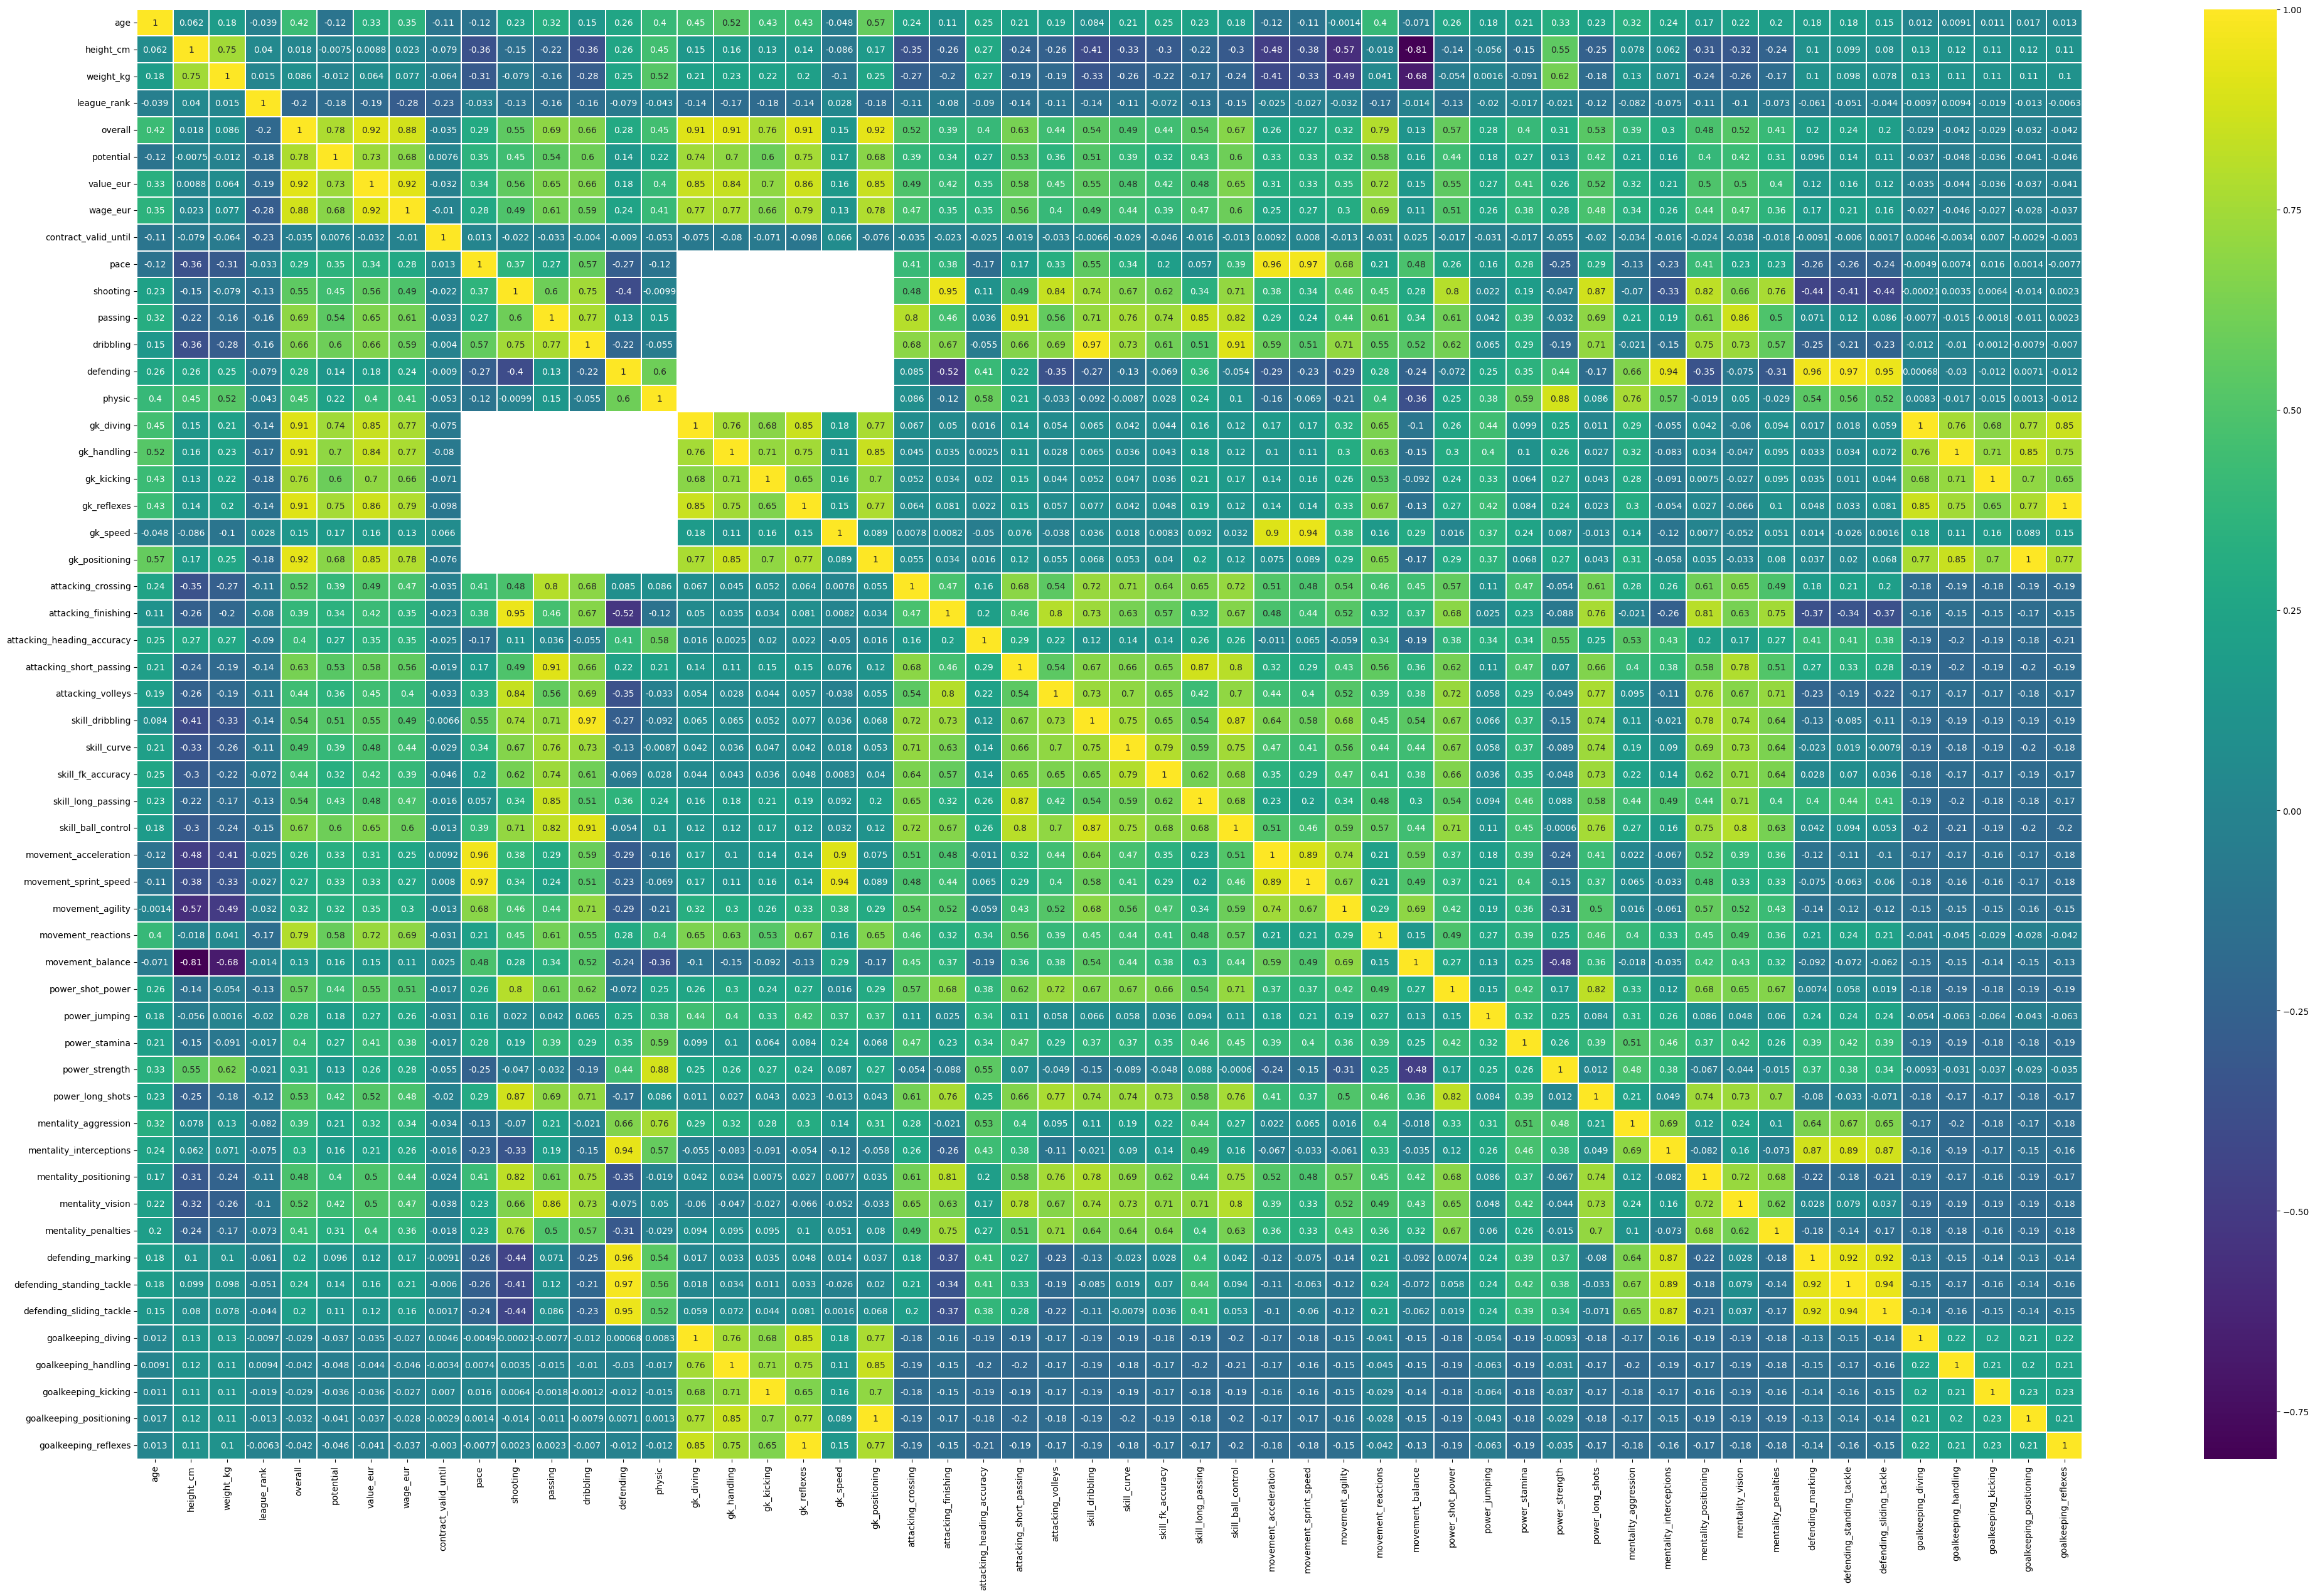

In [7]:
fig, ax = plt.subplots(figsize=(50,30))
sns.heatmap(fifa15.corr(method = 'spearman'),cmap ="viridis", ax=ax, annot=True, linewidths=.2 )


- **Obtaining positional data**

In [8]:
# #RWB
RWB15 = fifa15[fifa15['player_positions'] == 'RWB']
RWB15.reset_index(inplace = True, drop = True)
RWB15 = RWB15.dropna(axis=1, how='all')

In [9]:
# #LWB
LWB15 = fifa15[fifa15['player_positions'] == 'LWB']
LWB15.reset_index(inplace = True, drop = True)
LWB15 = LWB15.dropna(axis=1, how='all')

In [10]:
# #CF
CF15 = fifa15[fifa15['player_positions'] == 'CF']
CF15.reset_index(inplace = True, drop = True)
CF15 = CF15.dropna(axis=1, how='all')

In [11]:
# #LW
LW15 = fifa15[fifa15['player_positions'] == 'LW']
LW15.reset_index(inplace = True, drop = True)
LW15 = LW15.dropna(axis=1, how='all')

In [12]:
# #RW
RW15 = fifa15[fifa15['player_positions'] == 'RW']
RW15.reset_index(inplace = True, drop = True)
RW15 = RW15.dropna(axis=1, how='all')

In [13]:
# #LB
LB15 = fifa15[fifa15['player_positions'] == 'LB']
LB15.reset_index(inplace = True, drop = True)
LB15 = LB15.dropna(axis=1, how='all')

In [14]:
# #RB
RB15 = fifa15[fifa15['player_positions'] == 'RB']
RB15.reset_index(inplace = True, drop = True)
RB15 = RB15.dropna(axis=1, how='all')

In [15]:
# #CAM
CAM15 = fifa15[fifa15['player_positions'] == 'CAM']
CAM15.reset_index(inplace = True, drop = True)
CAM15 = CAM15.dropna(axis=1, how='all')

In [16]:
# #RM
RM15 = fifa15[fifa15['player_positions'] == 'RM']
RM15.reset_index(inplace = True, drop = True)
RM15 = RM15.dropna(axis=1, how='all')

In [17]:
# #LM
LM15 = fifa15[fifa15['player_positions'] == 'LM']
LM15.reset_index(inplace = True, drop = True)
LM15 = LM15.dropna(axis=1, how='all')

In [18]:
# #CDM
CDM15 = fifa15[fifa15['player_positions'] == 'CDM']
CDM15.reset_index(inplace = True, drop = True)
CDM15 = CDM15.dropna(axis=1, how='all')

In [19]:
# #ST
ST15 = fifa15[fifa15['player_positions'] == 'ST']
ST15.reset_index(inplace = True, drop = True)
ST5 = ST15.dropna(axis=1, how='all')

In [20]:
# #CM
CM15 = fifa15[fifa15['player_positions'] == 'CM']
CM15 = CM15.dropna(axis=1, how='all')
CM15.reset_index(inplace = True, drop = True)

In [21]:
# #CB
CB15 = fifa15[fifa15['player_positions'] == 'CB']
CB15.reset_index(inplace = True, drop = True)
CB15.dropna(axis=1, how='all')


,short_name,age,height_cm,weight_kg,club_name,league_rank,overall,potential,value_eur,wage_eur,player_positions,player_tags,joined,contract_valid_until,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,year
0,D. Tumasyan,29,185,82,FC Ufa,1.0,64,64,400000,2000,CB,NaN,NaN,2015.0,60.0,42.0,47.0,43.0,67.0,65.0,46,37,71,60,43,32,31,39,55,54,58,62,52,55,58,53,71,64,70,41,52,68,31,25,51,67,66,62,12,5,5,7,5,15
1,A. Olvera,28,173,63,Monarcas Morelia,1.0,64,64,450000,7000,CB,NaN,2012-01-01,2020.0,64.0,48.0,60.0,65.0,64.0,67.0,62,43,63,64,49,66,41,51,57,64,65,64,67,61,68,57,83,81,64,49,55,62,53,58,47,64,66,64,10,12,5,5,5,15
2,R. Wood,28,191,88,Rotherham United,2.0,64,64,450000,4000,CB,NaN,2014-07-01,2015.0,32.0,30.0,42.0,41.0,66.0,70.0,41,28,70,40,25,36,21,26,42,50,33,32,29,60,45,38,63,72,75,24,58,58,39,55,27,66,69,66,6,13,9,5,9,15
3,G. MacKenzie,28,191,86,Blackpool,2.0,64,64,450000,7000,CB,#Strength,2013-07-05,2015.0,42.0,30.0,41.0,39.0,63.0,78.0,25,22,67,48,32,31,21,36,43,45,34,49,48,57,48,52,56,67,90,21,65,62,23,48,55,62,62,64,13,12,15,13,14,15
4,S. O'Connor,24,185,75,Bray Wanderers,1.0,53,59,50000,2000,CB,NaN,2009-01-01,2019.0,55.0,36.0,34.0,43.0,52.0,63.0,24,32,49,43,23,39,23,27,28,42,54,55,49,51,64,51,61,53,71,31,54,53,43,39,41,53,51,53,15,14,11,9,11,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3267,E. Abidal,34,186,74,Olympiacos CFP,1.0,75,75,1000000,45000,CB,NaN,2014-07-06,2015.0,54.0,32.0,62.0,58.0,78.0,69.0,63,25,64,70,42,51,59,41,63,67,48,59,58,78,52,45,64,53,77,22,69,86,40,51,58,77,81,73,14,15,9,8,14,15
3268,Etxeita,26,185,79,Athletic Club de Bilbao,1.0,73,76,2500000,40000,CB,NaN,2013-07-02,2016.0,62.0,33.0,50.0,53.0,72.0,81.0,35,28,73,61,37,44,34,42,53,61,55,67,67,67,55,43,78,79,83,33,81,71,37,49,29,70,72,77,5,6,7,9,6,15
3269,J. Heitinga,30,182,72,Hertha BSC,1.0,76,76,3800000,60000,CB,NaN,2014-07-01,2016.0,67.0,56.0,66.0,55.0,75.0,75.0,64,46,72,73,53,43,42,72,71,66,64,69,65,81,70,79,85,66,75,55,83,74,43,57,66,76,76,73,13,11,15,7,8,15
3270,Jorge,17,192,75,CD Tenerife,2.0,58,64,90000,2000,CB,NaN,2014-07-01,2015.0,61.0,33.0,35.0,33.0,60.0,61.0,36,29,70,37,37,28,31,37,30,34,64,58,42,49,48,49,66,56,64,26,57,57,30,37,41,52,66,60,6,13,6,7,10,15


- Performing the actions done on FIFA 15 Dataframe to *FIFA 16,17,18,19,20 & 21*

In [22]:
fifa16 = pd.read_csv('/content/drive/MyDrive/BE Project/players_16.csv')
fifa16.drop(fifa16.iloc[:, 80:], inplace = True, axis = 1) #changed fifa15.iloc to fifa16.loc
fifa16.drop(['gk_handling','gk_diving','gk_kicking','gk_reflexes','gk_speed','gk_positioning','sofifa_id', 'player_url','long_name', 'dob','nationality', 'league_name', 'preferred_foot', 'international_reputation', 'weak_foot','skill_moves', 'work_rate', 'body_type', 'real_face', 'team_position','team_jersey_number','loaned_from','nation_position','nation_jersey_number','player_traits'], inplace = True, axis = 1)#sofifa_id, player_url,Long Name, DOB, Nationality, League name, 'preferred_foot', 'international_reputation', 'weak_foot','skill_moves', 'work_rate', 'body_type', 'real_face', 'team_position','team_jersey_number','loaned_from','nation_position','nation_jersey_number''player_traits'
fifa16['player_positions'] = fifa16['player_positions'].str.split(', ')
fifa16 = fifa16.explode('player_positions')
fifa16.sort_values(by = ['player_positions', 'overall'], ascending = True, inplace=True)
fifa16.reset_index(inplace = True, drop = True)

year = []
for i in fifa16.iterrows():
  year.append('16')
fifa16['year'] = year


In [23]:
fifa17 = pd.read_csv('/content/drive/MyDrive/BE Project/players_17.csv')
fifa17.drop(fifa17.iloc[:, 80:], inplace = True, axis = 1)
fifa17.drop(['gk_handling','gk_diving','gk_kicking','gk_reflexes','gk_speed','gk_positioning','sofifa_id', 'player_url','long_name', 'dob','nationality', 'league_name', 'preferred_foot', 'international_reputation', 'weak_foot','skill_moves', 'work_rate', 'body_type', 'real_face', 'team_position','team_jersey_number','loaned_from','nation_position','nation_jersey_number','player_traits'], inplace = True, axis = 1)
fifa17['player_positions'] = fifa17['player_positions'].str.split(', ')
fifa17 = fifa17.explode('player_positions')
fifa17.sort_values(by = ['player_positions', 'overall'], ascending = True, inplace=True)
fifa17.reset_index(inplace = True, drop = True)

year = []
for i in fifa17.iterrows():
  year.append('17')
fifa17['year'] = year

In [24]:
fifa18 = pd.read_csv('/content/drive/MyDrive/BE Project/players_18.csv')
fifa18.drop(fifa18.iloc[:, 80:], inplace = True, axis = 1)
fifa18.drop(['gk_handling','gk_diving','gk_kicking','gk_reflexes','gk_speed','gk_positioning','sofifa_id', 'player_url','long_name', 'dob','nationality', 'league_name', 'preferred_foot', 'international_reputation', 'weak_foot','skill_moves', 'work_rate', 'body_type', 'real_face', 'team_position','team_jersey_number','loaned_from','nation_position','nation_jersey_number','player_traits'], inplace = True, axis = 1)
fifa18['player_positions'] = fifa18['player_positions'].str.split(', ')
fifa18 = fifa18.explode('player_positions')
fifa18.sort_values(by = ['player_positions', 'overall'], ascending = True, inplace=True)
fifa18.reset_index(inplace = True, drop = True)

year = []
for i in fifa18.iterrows():
  year.append('18')
fifa18['year'] = year

In [25]:
fifa19 = pd.read_csv('/content/drive/MyDrive/BE Project/players_19.csv')
fifa19.drop(fifa19.iloc[:, 80:], inplace = True, axis = 1)
fifa19.drop(['gk_handling','gk_diving','gk_kicking','gk_reflexes','gk_speed','gk_positioning', 'sofifa_id', 'player_url','long_name', 'dob','nationality', 'league_name', 'preferred_foot', 'international_reputation', 'weak_foot','skill_moves', 'work_rate', 'body_type', 'real_face', 'team_position','team_jersey_number','loaned_from','nation_position','nation_jersey_number','player_traits'], inplace = True, axis = 1)
fifa19['player_positions'] = fifa19['player_positions'].str.split(', ')
fifa19 = fifa19.explode('player_positions')
fifa19.sort_values(by = ['player_positions', 'overall'], ascending = True, inplace=True)
fifa19.reset_index(inplace = True, drop = True)

year = []
for i in fifa19.iterrows():
  year.append('19')
fifa19['year'] = year

In [26]:
fifa20 = pd.read_csv('/content/drive/MyDrive/BE Project/players_20.csv')
fifa20.drop(fifa20.iloc[:, 80:], inplace = True, axis = 1)
fifa20.drop(['gk_handling','gk_diving','gk_kicking','gk_reflexes','gk_speed','gk_positioning', 'sofifa_id', 'player_url','long_name', 'dob','nationality', 'league_name', 'preferred_foot', 'international_reputation', 'weak_foot','skill_moves', 'work_rate', 'body_type', 'real_face', 'team_position','team_jersey_number','loaned_from','nation_position','nation_jersey_number','player_traits'], inplace = True, axis = 1)
fifa20['player_positions'] = fifa20['player_positions'].str.split(', ')
fifa20 = fifa20.explode('player_positions')
fifa20.sort_values(by = ['player_positions', 'overall'], ascending = True, inplace=True)
fifa20.reset_index(inplace = True, drop = True)

year = []
for i in fifa20.iterrows():
  year.append('20')
fifa20['year'] = year

In [27]:
fifa21 = pd.read_csv('/content/drive/MyDrive/BE Project/players_21.csv')
fifa21.drop(fifa21.iloc[:, 80:], inplace = True, axis = 1)
fifa21.drop(['gk_handling','gk_diving','gk_kicking','gk_reflexes','gk_speed','gk_positioning', 'sofifa_id', 'player_url','long_name', 'dob','nationality', 'league_name', 'preferred_foot', 'international_reputation', 'weak_foot','skill_moves', 'work_rate', 'body_type', 'real_face', 'team_position','team_jersey_number','loaned_from','nation_position','nation_jersey_number','player_traits'], inplace = True, axis = 1)
fifa21['player_positions'] = fifa21['player_positions'].str.split(', ')
fifa21 = fifa21.explode('player_positions')
fifa21.sort_values(by = ['player_positions', 'overall'], ascending = True, inplace=True)
fifa21.reset_index(inplace = True, drop = True)

year = []
for i in fifa21.iterrows():
  year.append('21')
fifa21['year'] = year

#Understanding the data
- The following graph represents the **linear co-relativity of sub-attribute -  attribute pairs**

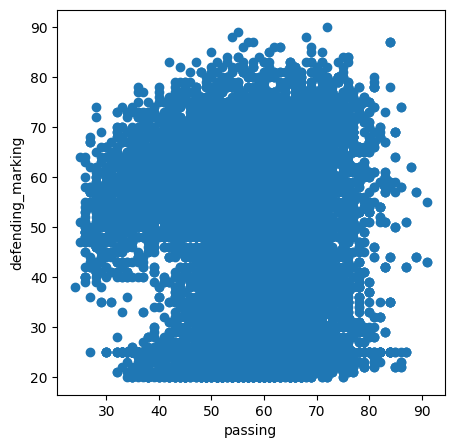

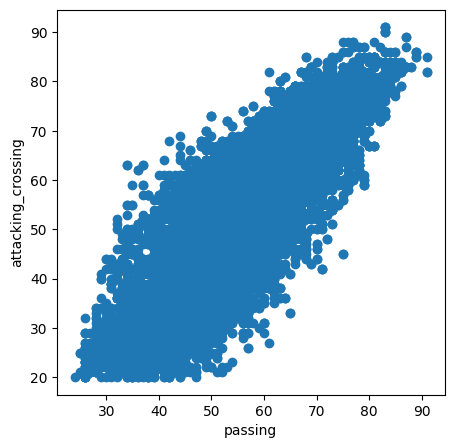

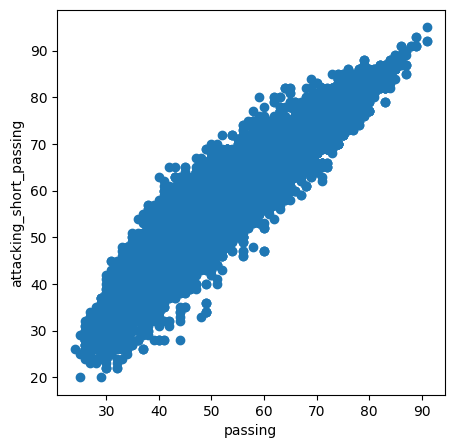

In [28]:
X = np.array(fifa15['passing'])
Y = np.array(fifa15['defending_marking'])
Z = np.array(fifa15['attacking_crossing'])
A = np.array(fifa15['attacking_short_passing'])
fig1, ax1 = plt.subplots(figsize=(5,5))
plt.scatter(X,Y)
plt.xlabel('passing')
plt.ylabel('defending_marking')
plt.show()

fig1, ax1 = plt.subplots(figsize=(5,5))
plt.scatter(X,Z)
plt.xlabel('passing')
plt.ylabel('attacking_crossing')
plt.show()

fig1, ax1 = plt.subplots(figsize=(5,5))
plt.scatter(X,A)
plt.xlabel('passing')
plt.ylabel('attacking_short_passing')
plt.show()

We observe collinearity, in some attributes with target variables.

We further observe how much better the same can perform when position specific

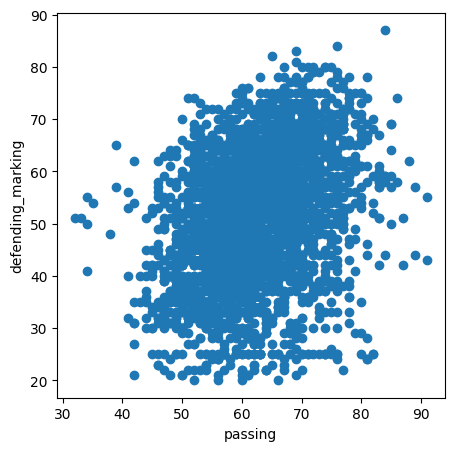

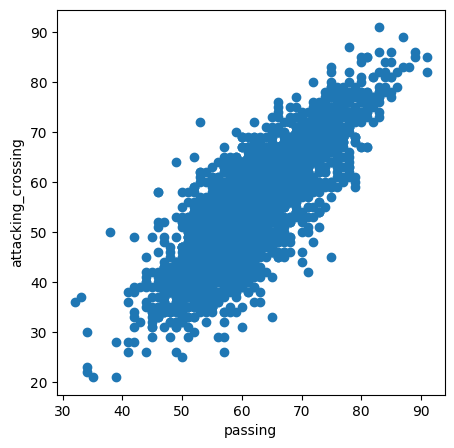

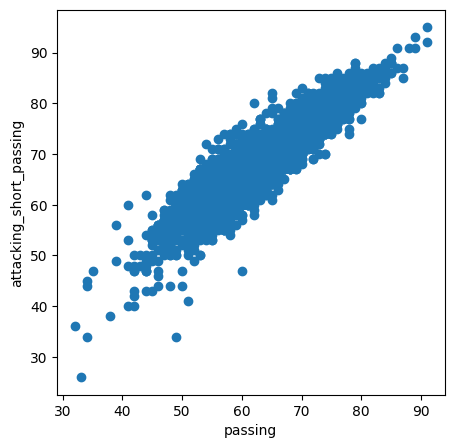

In [29]:
X = np.array(CM15['passing'])
Y = np.array(CM15['defending_marking'])
Z = np.array(CM15['attacking_crossing'])
A = np.array(CM15['attacking_short_passing'])


fig1, ax1 = plt.subplots(figsize=(5,5))
plt.scatter(X,Y)
plt.xlabel('passing')
plt.ylabel('defending_marking')
plt.show()

fig1, ax1 = plt.subplots(figsize=(5,5))
plt.scatter(X,Z)
plt.xlabel('passing')
plt.ylabel('attacking_crossing')
plt.show()

fig1, ax1 = plt.subplots(figsize=(5,5))
plt.scatter(X,A)
plt.xlabel('passing')
plt.ylabel('attacking_short_passing')
plt.show()


These charts help understand how some attributes  aren't linearly correlated, while others are.
In this case:
- `passing` and `defending_marking` not greatly correlated
- `passing` and `attacking_crossing` more so correlated
- `passing` and `attacking_short_passing` even more so correlated


Based on the correlation matrix obtained above, we define SubAttributes below

# Defining SubAttribute - Attribute sets
- The sets are defined based on the co-relation matrix.
- SubAttributes with a **0.75 or higher relativity index** are considered under the attribute.
- We make sure that no dependant variables are repeated.
- The co-relation sets are **referenced to the position to increase accuracy**

In [30]:
#DEFINING SUBATTRIBUTES AND TOP 6 ATTRIBUTE MATCH DEPENDING ON POSITIONAL REQUIREMENT
corrAttribute = {}
keyset = ['pace','defending','passing','shooting','dribbling','physic','overall','potential']
batchset = [CM15,CB15,ST15,CDM15,LM15,RM15,CAM15,RB15,LB15,RW15,LW15,CF15,LWB15,RWB15]
batchNameSet = ['CM15','CB15','ST15','CDM15','LM15','RM15','CAM15','RB15','LB15','RW15','LW15','CF15','LWB15','RWB15']


#Function used to fetch only those attribute highly correlated to targets(keyset). Function also looks at attributes specific to position
def getCorrAttributes():
  for j in range(len(batchset)):
    tempDict = {}
    for k in keyset:
      tempList = []
      for i in range(len(batchset[j].corr().xs(key=k))):
        if (float(batchset[j].corr().xs(key=k)[i]) >= 0.75 and batchset[j].corr().columns[i] not in keyset ):
          tempList.append(batchset[j].corr().columns[i])
        tempDict[k] = tempList
    corrAttribute[batchNameSet[j]] = tempDict

  for j in batchNameSet:
    del corrAttribute[j]['overall']
    del corrAttribute[j]['potential']
    corrAttribute[j]['physic'].append('height_cm')
    corrAttribute[j]['physic'].append('weight_kg')
    print(j, corrAttribute[j])

def Attributes(position):
  return corrAttribute[position+'15']

getCorrAttributes()
Attributes('CM')

<ipython-input-30-7136e3d66570>:14: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  for i in range(len(batchset[j].corr().xs(key=k))):
<ipython-input-30-7136e3d66570>:15: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  if (float(batchset[j].corr().xs(key=k)[i]) >= 0.75 and batchset[j].corr().columns[i] not in keyset ):
<ipython-input-30-7136e3d66570>:16: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  tempList.append(batchset[j].corr().columns[i])


CM15 {'pace': ['movement_acceleration', 'movement_sprint_speed'], 'defending': ['mentality_interceptions', 'defending_marking', 'defending_standing_tackle', 'defending_sliding_tackle'], 'passing': ['attacking_crossing', 'attacking_short_passing', 'skill_dribbling', 'skill_curve', 'skill_long_passing', 'skill_ball_control', 'mentality_vision'], 'shooting': ['attacking_finishing', 'attacking_volleys', 'power_shot_power', 'power_long_shots'], 'dribbling': ['skill_dribbling', 'skill_ball_control', 'mentality_vision'], 'physic': ['power_strength', 'mentality_aggression', 'height_cm', 'weight_kg']}
CB15 {'pace': ['movement_acceleration', 'movement_sprint_speed'], 'defending': ['attacking_heading_accuracy', 'mentality_interceptions', 'defending_marking', 'defending_standing_tackle', 'defending_sliding_tackle'], 'passing': ['attacking_crossing', 'attacking_short_passing', 'skill_long_passing', 'skill_ball_control', 'mentality_vision'], 'shooting': ['attacking_finishing', 'power_shot_power', 'p

{'pace': ['movement_acceleration', 'movement_sprint_speed'],
 'defending': ['mentality_interceptions',
  'defending_marking',
  'defending_standing_tackle',
  'defending_sliding_tackle'],
 'passing': ['attacking_crossing',
  'attacking_short_passing',
  'skill_dribbling',
  'skill_curve',
  'skill_long_passing',
  'skill_ball_control',
  'mentality_vision'],
 'shooting': ['attacking_finishing',
  'attacking_volleys',
  'power_shot_power',
  'power_long_shots'],
 'dribbling': ['skill_dribbling', 'skill_ball_control', 'mentality_vision'],
 'physic': ['power_strength',
  'mentality_aggression',
  'height_cm',
  'weight_kg']}

#Setting up a new Linear Regression Model
- The system is defines a single model for all dependancies
- The model accepts **multiple independant variables**(the subattributes) and **1 dependant variable**(the major attribute)

In [31]:
def predict(x,y,no_model:bool=True):
  xTrain,xTest,yTrain,yTest = train_test_split(x,y,test_size=0.2)
  LR_model1 = LinearRegression()
  LR_model1.fit(xTrain,yTrain)
  predictions = LR_model1.predict(xTest)
  if no_model:
    return(xTrain, xTest, yTrain, yTest, predictions)
  elif no_model == False:
    return(LR_model1)

# Model Accuracy
- The SubAttribute - Attribute **sets** and the Linear Regression **Model** are **combined** so as to give us the **accuracy of the model with respect to the referenced Attribute sets**.

In [32]:
!pip install colorama

In [33]:
from colorama import Back, Style, Fore
for i in range(len(corrAttribute)):  #CORR ATTRIBUTE IS IN THE FORM = {CM:{PACE:[],dEFEND:[]},}
  currentDF = batchset[i]
  attributeDFdict = corrAttribute[batchNameSet[i]]
  print(batchNameSet[i])
  for j in attributeDFdict:
    x = currentDF[attributeDFdict[j]]
    y = currentDF[j]
    xTrain, xTest, yTrain, yTest,predictions = predict(x,y)
    if r2_score(predictions, yTest)*100 > 95.0:
      print(f'{j} : {Fore.GREEN}{(r2_score(predictions, yTest)*100).round(2)}','%',f'{Fore.RESET}')
    else: print(f'{Style.RESET_ALL}{j} in {batchNameSet[i]} : {(r2_score(predictions, yTest)*100).round(2)}','%')
      #
i=21


CM15
pace : 99.9 % 
defending : 99.27 % 
passing : 99.56 % 
shooting : 99.59 % 
dribbling : 97.13 % 
physic in CM15 : 92.08 %
CB15
pace : 99.93 % 
defending : 99.86 % 
passing : 99.15 % 
shooting : 99.15 % 
dribbling : 97.58 % 
physic in CB15 : 68.19 %
ST15
pace : 99.92 % 
defending in ST15 : 90.79 %
passing : 99.18 % 
shooting : 99.63 % 
dribbling : 96.2 % 
physic in ST15 : 73.65 %
CDM15
pace : 99.92 % 
defending : 98.82 % 
passing : 99.69 % 
shooting : 99.62 % 
dribbling : 97.08 % 
physic in CDM15 : 72.56 %
LM15
pace : 99.88 % 
defending : 99.41 % 
passing : 99.6 % 
shooting : 99.55 % 
dribbling : 97.26 % 
physic in LM15 : 69.92 %
RM15
pace : 99.89 % 
defending : 99.41 % 
passing : 98.88 % 
shooting : 99.62 % 
dribbling : 97.24 % 
physic in RM15 : 73.05 %
CAM15
pace : 99.9 % 
defending : 99.16 % 
passing : 99.14 % 
shooting : 99.67 % 
dribbling : 96.69 % 
physic in CAM15 : 67.99 %
RB15
pace : 99.92 % 
defending : 98.9 % 
passing : 98.95 % 
shooting : 99.32 % 
dribbling : 97.74 % 
phy

# The Teams Needs
 - The positional requirement is taken from user
 - The possible budget of the user is taken
 - On basis of given inputs we show how the players will be shortlisted and shown as output

In [34]:
positionNeed = input("Enter the position in which player is needed: ").upper()+str('15') # CM15,CB15,ST15,CDM15,LM15,RM15,CAM15,RB15,LB15,RW15,LW15,CF15,LWB15,RWB15
budget = int(input("Enter the maximum amount to be spent: "))
for i in range(len(batchNameSet)):
  if positionNeed == batchNameSet[i]:
    possibles = batchset[i]
    playersWithinBudget = possibles[possibles['value_eur'] <= int(budget)]
    playersWithinBudget.sort_values(by=['potential'], inplace = True, ascending=0)
playersWithinBudget.head(20)


Enter the position in which player is needed: CB
Enter the maximum amount to be spent: 500000


<ipython-input-34-0e728aabd238>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playersWithinBudget.sort_values(by=['potential'], inplace = True, ascending=0)


,short_name,age,height_cm,weight_kg,club_name,league_rank,overall,potential,value_eur,wage_eur,player_positions,player_tags,joined,contract_valid_until,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,year
1162,F. Amorebielsa,28,194,83,NaN,NaN,82,82,0,0,CB,"#Aerial Threat, #Strength",NaN,NaN,53.0,47.0,56.0,50.0,81.0,85.0,NaN,NaN,NaN,NaN,NaN,NaN,48,38,79,67,53,44,41,34,50,60,53,53,44,73,43,69,68,68,91,41,93,77,49,59,56,81,84,83,15,5,12,6,12,15
1288,N. Aké,19,180,75,Chelsea,1.0,67,82,450000,10000,CB,NaN,2012-07-01,2018.0,77.0,48.0,63.0,65.0,66.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,56,40,58,74,51,62,62,58,68,68,77,77,66,72,63,62,71,64,67,55,63,68,41,49,47,63,71,67,9,6,6,15,9,15
1285,K. Ayhan,19,185,84,FC Schalke 04,1.0,67,82,450000,10000,CB,NaN,2013-04-13,2017.0,68.0,57.0,65.0,64.0,67.0,70.0,NaN,NaN,NaN,NaN,NaN,NaN,58,46,56,68,35,65,81,75,62,63,66,69,63,70,65,82,83,64,74,66,64,71,52,62,46,67,70,65,15,9,7,13,9,15
1275,J. Lascelles,20,189,83,Nottingham Forest,2.0,67,81,500000,7000,CB,NaN,NaN,2015.0,66.0,27.0,45.0,53.0,67.0,71.0,NaN,NaN,NaN,NaN,NaN,NaN,45,22,71,53,32,45,28,25,48,54,66,66,80,63,62,39,80,67,74,26,66,66,20,38,25,67,68,65,9,14,6,9,14,15
579,Óscar Gil,19,182,72,Athletic Club de Bilbao,1.0,62,81,190000,3000,CB,NaN,2013-07-01,2016.0,43.0,42.0,58.0,53.0,61.0,65.0,NaN,NaN,NaN,NaN,NaN,NaN,45,40,64,69,27,49,49,43,59,63,54,34,36,56,62,45,65,64,67,44,60,68,51,59,41,53,65,56,5,14,14,7,8,15
752,M. Sarr,19,188,83,Borussia Dortmund,1.0,63,81,210000,5000,CB,NaN,2013-07-01,2016.0,67.0,28.0,51.0,57.0,63.0,64.0,NaN,NaN,NaN,NaN,NaN,NaN,32,23,69,67,22,54,26,32,62,58,64,69,67,53,55,45,72,62,67,21,56,61,22,44,39,60,67,60,7,11,13,9,6,15
750,L. Hernández,18,180,75,Atlético Madrid,1.0,63,81,200000,4000,CB,NaN,2007-08-18,2016.0,69.0,50.0,49.0,60.0,63.0,61.0,NaN,NaN,NaN,NaN,NaN,NaN,29,55,74,66,22,58,37,27,68,60,68,69,69,60,61,61,65,61,59,46,66,65,26,32,33,62,60,57,9,6,7,13,9,15
612,Carlos Blanco,18,188,70,Juventus,1.0,62,81,200000,4000,CB,NaN,2014-08-01,2017.0,58.0,31.0,36.0,40.0,67.0,62.0,NaN,NaN,NaN,NaN,NaN,NaN,31,23,65,40,30,35,29,34,37,44,55,61,40,46,57,49,74,55,69,30,49,65,29,35,42,69,69,65,7,13,9,6,6,15
2239,A. Dragović,23,186,79,NaN,NaN,75,81,0,0,CB,NaN,NaN,NaN,72.0,50.0,61.0,64.0,77.0,77.0,NaN,NaN,NaN,NaN,NaN,NaN,48,40,75,67,36,61,31,60,61,67,70,73,67,73,64,68,80,73,82,52,67,83,66,70,54,75,78,74,9,6,10,12,7,15
1272,D. Khodzhaniyazov,17,180,70,Zenit St. Petersburg,1.0,67,81,425000,8000,CB,NaN,2013-07-01,2015.0,71.0,54.0,55.0,60.0,68.0,65.0,NaN,NaN,NaN,NaN,NaN,NaN,63,51,63,61,36,57,58,59,52,58,69,73,67,71,73,63,75,71,60,61,68,69,41,38,53,66,70,69,6,6,9,15,10,15


We merge all the datasets right from FIFA 15 through FIFA 21
- Perform similar preprocessing steps as done for previous datasets

In [35]:
AllPlayers = pd.read_excel('/content/drive/MyDrive/BE Project//AllPlayers.xlsx')

In [36]:
AllPlayers.drop('Unnamed: 0', inplace = True, axis = 1)
AllPlayers.sort_values(by=['short_name', 'player_positions', 'year'], axis=0, ascending=[True,True,True],inplace=True)
print(AllPlayers.columns.tolist())

['short_name', 'age', 'height_cm', 'weight_kg', 'club_name', 'league_rank', 'overall', 'potential', 'value_eur', 'wage_eur', 'player_positions', 'player_tags', 'joined', 'contract_valid_until', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots', 'mentality_aggression', 'mentality_interceptions', 'mentality_positioning', 'mentality_vision', 'mentality_penalties', 'defending_marking', 'defending_standing_tackle', 'defending_sliding_tackle', 'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexe

In [37]:
def AddNewPlayer():
  playerInfo = input("enter values")
  AllPlayers.loc[len(AllPlayers.index)] = ['N. Kubal', 21, 175, 68, 'Man United', 1.0, 93, 99, 6900000, 5000, 'CM', '#dribbler', '2021-04-18', 2023.0, 85.0, 93.0, 85.0, 89.0, 69.0, 75.0, 84.0, 94.0, 90.0, 80.0, 86.0, 86.0, 81.0, 79.0, 79.0, 91.0, 78.0, 87.0, 85.0, 94.0, 71.0, 78.0, 74.0, 81.0, 71.0, 83.0, 69.0, 67.0, 95.0, 76.0, 90.0, 24.0, 45.0, 20.0, 6.0, 3.0, 21.0, 10.0, 9.0, 16  ]

In [38]:
AllPlayers.sort_values(by=['year','player_positions'], inplace=True,axis=0, ascending=[True,True])
trainingPlayers = AllPlayers[AllPlayers['year']==15]

# All positions CM,CB,ST,CDM,LM,RM,CAM,RB,LB,RW,LW,CF,LWB,RWB
CM = trainingPlayers[trainingPlayers['player_positions'] == 'CM']
CM.reset_index(inplace = True, drop = True)
CB = trainingPlayers[trainingPlayers['player_positions'] == 'CB']
CB.reset_index(inplace = True, drop = True)
ST = trainingPlayers[trainingPlayers['player_positions'] == 'ST']
ST.reset_index(inplace = True, drop = True)
CDM = trainingPlayers[trainingPlayers['player_positions'] == 'CDM']
CDM.reset_index(inplace = True, drop = True)
LM = trainingPlayers[trainingPlayers['player_positions'] == 'LM']
LM.reset_index(inplace = True, drop = True)
RM = trainingPlayers[trainingPlayers['player_positions'] == 'RM']
RM.reset_index(inplace = True, drop = True)
CAM = trainingPlayers[trainingPlayers['player_positions'] == 'CAM']
CAM.reset_index(inplace = True, drop = True)
RB = trainingPlayers[trainingPlayers['player_positions'] == 'RB']
RB.reset_index(inplace = True, drop = True)
LB = trainingPlayers[trainingPlayers['player_positions'] == 'LB']
LB.reset_index(inplace = True, drop = True)
RW = trainingPlayers[trainingPlayers['player_positions'] == 'RW']
RW.reset_index(inplace = True, drop = True)
LW = trainingPlayers[trainingPlayers['player_positions'] == 'LW']
LW.reset_index(inplace = True, drop = True)
CF = trainingPlayers[trainingPlayers['player_positions'] == 'CF']
CF.reset_index(inplace = True, drop = True)
LWB = trainingPlayers[trainingPlayers['player_positions'] == 'LWB']
LWB.reset_index(inplace = True, drop = True)
RWB = trainingPlayers[trainingPlayers['player_positions'] == 'RWB']
RWB.reset_index(inplace = True, drop = True)
batchset = [CM,CB,ST,CDM,LM,RM,CAM,RB,LB,RW,LW,CF,LWB,RWB]
batchNameSet = ['CM','CB','ST','CDM','LM','RM','CAM','RB','LB','RW','LW','CF','LWB','RWB']

# Shortlisting
- Based on position we fetch the respective players dataframe
- Then we fetch the attributes of said position
- We remove the unnecessary sub-attributes if any
- We then return the datasets of concurrent years and the attribute-subattribute sets

In [39]:
def playerPredictions(position, i):
  predictablePlayers = AllPlayers[AllPlayers['player_positions'] == position]
  predictablePlayers.reset_index(inplace = True, drop=True)
  playerTrainingSet = predictablePlayers[predictablePlayers['year'] == i]
  playerTestingSet = predictablePlayers[predictablePlayers['year'] == i+1]
  columnstokeep = ['short_name', 'age', 'height_cm', 'weight_kg', 'club_name', 'league_rank', 'value_eur', 'player_positions', 'year']
  columnstokeep.extend(keyset)
  attributesToKeep = Attributes(position)
  for keys in attributesToKeep:
    columnstokeep.extend(attributesToKeep[keys])
  for i in playerTrainingSet.columns.tolist():
    if i not in columnstokeep:
      playerTrainingSet.drop(i,axis = 1, inplace=True)
      playerTestingSet.drop(i,axis = 1, inplace=True)
  for i in keyset[0:6]:
    playerTestingSet.i = 0
  return playerTrainingSet, playerTestingSet, attributesToKeep #so i have two df each with just the columns important for any given position

In [40]:
A,B,C = playerPredictions('CF', 15)

<ipython-input-39-c18c8f2b539c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playerTrainingSet.drop(i,axis = 1, inplace=True)
<ipython-input-39-c18c8f2b539c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playerTestingSet.drop(i,axis = 1, inplace=True)
<ipython-input-39-c18c8f2b539c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playerTrainingSet.drop(i,axis = 1, inplace=True)
<ipython-input-39-c18c8f2b539c>:14: SettingWith

In [41]:
A.head(5)

,short_name,age,height_cm,weight_kg,club_name,league_rank,overall,potential,value_eur,player_positions,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_short_passing,attacking_volleys,skill_dribbling,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,power_shot_power,power_strength,power_long_shots,mentality_interceptions,mentality_positioning,mentality_vision,defending_marking,defending_standing_tackle,defending_sliding_tackle,year
0,A. Akhyadov,20,173,68,Terek Grozny,1.0,49,61,30000,CF,66.0,51.0,34.0,52.0,29.0,46.0,30,56,26,51,50,38,42,65,67,50,43,44,41,57,42,21.0,25,25,15
1,A. Al Mousa,33,175,70,Al Fateh,1.0,63,63,220000,CF,72.0,58.0,60.0,69.0,45.0,64.0,53,55,66,64,70,60,67,71,73,67,73,55,40,52,64,44.0,44,43,15
2,A. Al Saran,30,172,64,Al Faisaly,1.0,61,61,210000,CF,74.0,63.0,40.0,63.0,28.0,66.0,27,65,50,47,60,30,66,70,77,65,57,60,25,63,48,25.0,25,25,15
3,A. Andreu,26,178,73,Hamilton Academical FC,1.0,62,66,400000,CF,71.0,60.0,62.0,64.0,54.0,64.0,61,63,63,58,64,63,62,70,71,59,60,54,55,62,63,51.0,58,49,15
4,A. Armstrong,17,172,69,Newcastle United,1.0,60,80,190000,CF,72.0,62.0,54.0,62.0,30.0,56.0,44,62,58,55,58,54,62,75,70,64,57,62,35,54,51,25.0,25,20,15


In [42]:
B.head(5)

,short_name,age,height_cm,weight_kg,club_name,league_rank,overall,potential,value_eur,player_positions,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_short_passing,attacking_volleys,skill_dribbling,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,power_shot_power,power_strength,power_long_shots,mentality_interceptions,mentality_positioning,mentality_vision,defending_marking,defending_standing_tackle,defending_sliding_tackle,year
667,A. Akhyadov,21,175,67,Terek Grozny,1.0,55,65,140000,CF,66.0,56.0,42.0,57.0,26.0,67.0,31,61,49,52,51,40,60,65,67,60,69,45,42,58,43,22.0,17,19,16
668,A. Armstrong,18,172,69,Coventry City,3.0,65,84,1000000,CF,87.0,66.0,55.0,65.0,26.0,58.0,45,67,59,56,64,55,63,86,88,65,60,68,36,70,52,20.0,17,21,16
669,A. Barnes,25,186,77,Burnley,2.0,71,73,2000000,CF,71.0,70.0,60.0,70.0,42.0,78.0,65,71,64,65,69,54,73,74,69,73,75,65,35,71,56,33.0,46,39,16
670,A. Bunjaku,31,179,75,FC St. Gallen,1.0,67,67,625000,CF,70.0,65.0,56.0,66.0,30.0,65.0,50,65,63,67,65,44,66,68,72,71,71,59,39,71,59,18.0,26,22,16
671,A. Campbell,20,170,73,Notts County,4.0,62,72,475000,CF,86.0,59.0,47.0,64.0,22.0,49.0,39,63,58,56,62,42,60,81,90,56,51,54,16,60,46,20.0,19,14,16


In [43]:
C

{'pace': ['movement_acceleration', 'movement_sprint_speed'],
 'defending': ['mentality_interceptions',
  'defending_marking',
  'defending_standing_tackle',
  'defending_sliding_tackle'],
 'passing': ['attacking_crossing',
  'attacking_short_passing',
  'skill_long_passing',
  'skill_ball_control',
  'mentality_vision'],
 'shooting': ['attacking_finishing',
  'attacking_volleys',
  'power_shot_power',
  'power_long_shots',
  'mentality_positioning'],
 'dribbling': ['skill_dribbling', 'skill_ball_control'],
 'physic': ['power_strength', 'height_cm', 'weight_kg']}

- The following function helps us understand the closeness to the data by plotting the real vs the predicted values

Enter the position player is required at: CB
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)


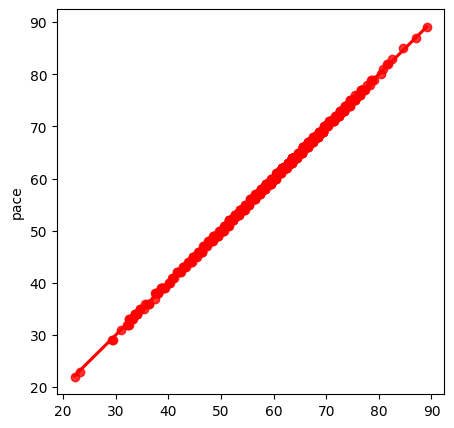

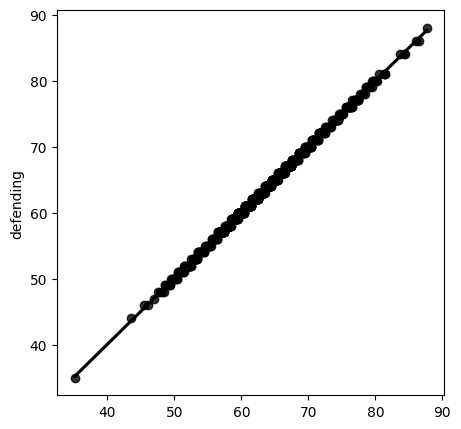

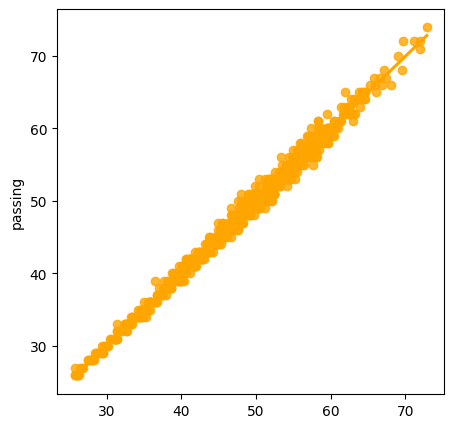

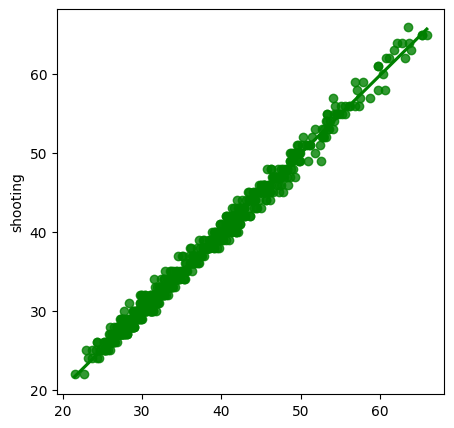

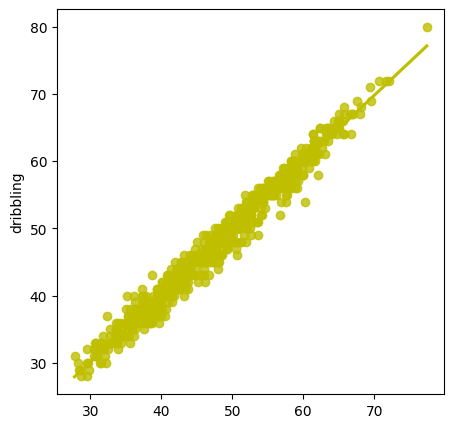

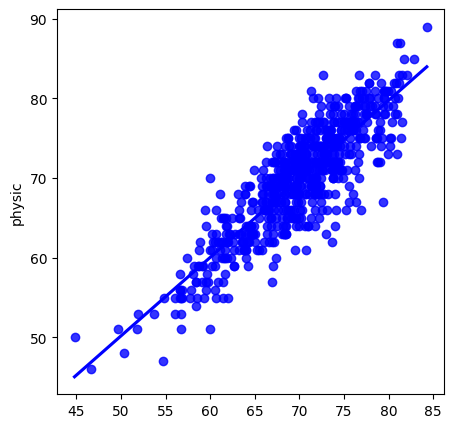

In [44]:
def modelGraph():
  playerPosition = str(input("Enter the position player is required at: ")).upper()# CM,CB,ST,CDM,LM,RM,CAM,RB,LB,RW,LW,CF,LWB,RWB
  df = batchNameSet.index(playerPosition)
  currentDF = batchset[df]
  attributeDFdict = corrAttribute[playerPosition+'15']

  for j in attributeDFdict:
      x = currentDF[attributeDFdict[j]]
      y = currentDF[j]

      xTrain,xTest,yTrain,yTest,predictions = predict(x,y)

      fig, ax = plt.subplots(figsize=(5,5))

      if j == 'shooting':
        print(sns.regplot(x= predictions, y = yTest, ci=None, color='g'))
      if j == 'pace':
        print(sns.regplot(x= predictions, y = yTest, ci=None, color='r'))
      if j == 'physic':
        print(sns.regplot(x= predictions, y = yTest, ci=None, color='b'))
      if j == 'defending':
        print(sns.regplot(x= predictions, y = yTest, ci=None, color='black'))
      if j == 'passing':
        print(sns.regplot(x= predictions, y = yTest, ci=None, color='orange'))
      if j == 'dribbling':
        print(sns.regplot(x= predictions, y = yTest, ci=None, color='y'))

modelGraph()


# Estimate Attributes
- The **dataset** for all the **players** and the **co-relativity attributes** of a **given position** are accepted as **input**
- The Linear Regression **model** is **retraining using** the dataframe of a **previous year** for said position
- This model is then used to **predict** the attribute **values** of the **consecutive years**
- The final dataset with the freshly **predicted attribute values** is returned to the user

In [45]:
def estimateAttributes(training,testing,Attributes):
  models = []
  for value in Attributes:
    X = training[Attributes[value]]
    Y = training[value]

    LR_model = predict(X,Y,no_model=False)
    testing['pace']
    testing[value] = LR_model.predict(testing[Attributes[value]])
    testing['pace']
  return(testing)
training,testing,Attribute = playerPredictions('CF',15)
estimateAttributes(training,testing,Attribute)

<ipython-input-39-c18c8f2b539c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playerTrainingSet.drop(i,axis = 1, inplace=True)
<ipython-input-39-c18c8f2b539c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playerTestingSet.drop(i,axis = 1, inplace=True)
<ipython-input-39-c18c8f2b539c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playerTrainingSet.drop(i,axis = 1, inplace=True)
<ipython-input-39-c18c8f2b539c>:14: SettingWith

,short_name,age,height_cm,weight_kg,club_name,league_rank,overall,potential,value_eur,player_positions,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_short_passing,attacking_volleys,skill_dribbling,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,power_shot_power,power_strength,power_long_shots,mentality_interceptions,mentality_positioning,mentality_vision,defending_marking,defending_standing_tackle,defending_sliding_tackle,year
667,A. Akhyadov,21,175,67,Terek Grozny,1.0,55,65,140000,CF,66.110545,56.661225,42.169841,55.642081,27.888376,66.354344,31,61,49,52,51,40,60,65,67,60,69,45,42,58,43,22.0,17,19,16
668,A. Armstrong,18,172,69,Coventry City,3.0,65,84,1000000,CF,87.079843,66.215210,53.354402,64.484211,26.121534,60.269929,45,67,59,56,64,55,63,86,88,65,60,68,36,70,52,20.0,17,21,16
669,A. Barnes,25,186,77,Burnley,2.0,71,73,2000000,CF,71.259795,69.627740,60.639096,70.548127,40.531006,68.433770,65,71,64,65,69,54,73,74,69,73,75,65,35,71,56,33.0,46,39,16
670,A. Bunjaku,31,179,75,FC St. Gallen,1.0,67,67,625000,CF,70.202614,65.290573,55.757700,65.998040,29.270159,66.748463,50,65,63,67,65,44,66,68,72,71,71,59,39,71,59,18.0,26,22,16
671,A. Campbell,20,170,73,Notts County,4.0,62,72,475000,CF,85.924746,59.074088,48.033475,62.359690,22.047425,53.926479,39,63,58,56,62,42,60,81,90,56,51,54,16,60,46,20.0,19,14,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1078,Yannick Djaló,29,171,62,Mordovia Saransk,1.0,70,70,1200000,CF,88.176298,69.546499,63.512710,74.220878,32.125197,42.201447,65,66,66,67,76,58,71,86,90,75,34,73,31,71,63,29.0,29,28,16
1079,Yuri,32,186,78,SD Ponferradina,2.0,71,71,1300000,CF,66.306379,72.125632,54.192941,70.556727,31.578279,72.671376,55,69,58,83,70,44,71,63,69,72,81,75,41,78,54,30.0,22,17,16
1080,Z. Al Mutairi,23,175,70,Al Faisaly,1.0,52,58,70000,CF,72.258333,49.146010,45.943568,49.586765,17.524394,67.625094,29,52,51,46,47,41,48,75,70,47,71,46,16,46,60,13.0,12,12,16
1081,Z. Clough,20,170,64,Bolton Wanderers,2.0,66,78,1100000,CF,76.996546,63.747349,53.741721,68.440807,36.176732,52.974745,40,67,64,63,69,33,66,77,77,60,49,60,41,66,66,27.0,36,30,16


# Taking Team Tac Tic
- Here, based on the Tac-Tic input by the user we **define the priority sequence of the attributes**
- Different attributes carry different weightage for different positions as well.

In [46]:
def getTeamTacTic():
  print(" 1. The 4-4-2 TACTIC adopts a finishing and moving with the ball" )
  print(" 2. The classic TIKI-TAKA adopts the entire team working harmoniously and focuses on building the game ")
  print(" 3. The Counter-Attack technique portrayed by Carlo Ancelotti makes a good defensive addition but pushes the strikers every chance they get")
  print(" 4. Build a Bus and you wont go wrong! This 4-4-2 Tac-Tic focuses completely on defence and does not let the others through")
  print(" 5. Start the game right from your box with the LONG-BALL, wingers are completely free as the ball moves through the air more " )
  print(" 6. Keep the other team on their toes, continuously PRESSING. Each step is calculated and opponent is never left free")
  choice = int(input("Whats your team playing style: "))
  prefer = int(input("Do you prefer 1. lower cost, more potential or 2. lower potential, more cost?"))
  if choice == 1:
    return (["shooting","dribbling","pace","passing","physic","defending"],prefer)
  elif choice==2:
    return (["passing","dribbling","shooting","pace","defending","physic"],prefer)
  elif choice==3:
    return (["pace","defending","shooting","passing","physic","dribbling"],prefer)
  elif choice==4:
    return (["defending","physic","passing","shooting","dribbling","pace"],prefer)
  elif choice==5:
    return (["passing","shooting","physic","dribbling","physic","defending"],prefer)
  elif choice==6:
    return (["shooting","dribbling","pace","passing","physic","defending"],prefer)


# MARKET VALUE CALCULATION
- We **calculate the market value** of the shortlisted players for any position
- The value is **generated progressively** by recursively using previous years market value to predict the concurrent
- Their attributes are used to calculates viz. **Potential and Overall**

In [47]:
def defineMarketValue(dataframe):
  ourframe = [fifa15,fifa16,fifa17,fifa18,fifa19,fifa20]
  for i in range(len(ourframe)-1):
    x = ourframe[i][['potential', 'overall']]
    y = ourframe[i]['value_eur']


    xTrain,xTest,yTrain,yTest = train_test_split(x,y,test_size=0.2)
    LR_model1 = LinearRegression()
    LR_model1.fit(xTrain,yTrain)

    ourframe[i+1]['value_eur'] = LR_model1.predict(ourframe[i+1][['potential','overall']])
  fifa21['value_eur'] = LR_model1.predict(fifa21[['potential','overall']])
  dataframe['value_eur'] = LR_model1.predict(dataframe[['potential','overall']])
  return(dataframe)

defineMarketValue(fifa21)


,short_name,age,height_cm,weight_kg,club_name,league_rank,overall,potential,value_eur,wage_eur,player_positions,release_clause_eur,player_tags,joined,contract_valid_until,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,year
0,D. Luna,17,173,60,Deportivo Cali,1.0,48,68,-1.986850e+06,500,CAM,141000.0,NaN,2020-01-01,2024.0,58.0,35.0,50.0,48.0,33.0,43.0,39,29,40,58,43,42,39,35,52,48,50,64,55,51,83,46,58,60,34,35,41,24,41,52,38,56,NaN,36,43,10,10,10,14,8,21
1,M. Ćoćić,17,183,70,TSV 1860 München,3.0,48,67,-2.053062e+06,500,CAM,125000.0,NaN,2020-07-01,2021.0,66.0,47.0,41.0,51.0,24.0,37.0,42,45,30,42,35,47,39,30,37,53,66,66,67,30,64,63,43,41,36,35,32,15,48,43,54,42,NaN,26,29,9,14,11,7,9,21
2,S. Navarro,19,186,74,Millonarios FC,1.0,48,61,-2.450336e+06,500,CAM,119000.0,NaN,2020-01-01,2024.0,61.0,37.0,51.0,44.0,33.0,52.0,37,34,37,58,35,41,39,37,54,45,60,61,49,44,57,50,50,50,56,26,43,23,43,58,47,56,NaN,38,44,13,13,15,8,15,21
3,R. Borges Rodrigues,16,173,67,Melbourne City FC,1.0,49,71,-1.599387e+06,500,CAM,135000.0,NaN,2019-09-09,2022.0,72.0,44.0,44.0,53.0,30.0,45.0,37,46,32,45,40,50,43,35,41,50,70,73,70,44,72,47,58,43,45,38,42,25,44,52,42,49,NaN,29,38,13,11,5,9,6,21
4,N. Iseguan,17,185,68,Exeter City,4.0,49,69,-1.731812e+06,500,CAM,165000.0,NaN,2020-06-30,2021.0,65.0,40.0,46.0,52.0,34.0,48.0,38,40,38,52,40,51,38,35,49,50,66,65,64,48,62,44,63,51,47,38,42,32,45,46,36,50,NaN,35,35,13,10,7,14,14,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30225,K. Benzema,32,185,81,Real Madrid,1.0,89,89,7.145460e+06,350000,ST,108700000.0,#Poacher,2009-07-09,2022.0,74.0,85.0,81.0,86.0,40.0,76.0,75,88,91,86,86,87,81,73,73,90,77,72,79,91,69,84,79,78,80,79,63,39,90,87,84,90,NaN,24,18,13,11,5,5,7,21
30226,K. Mbappé,21,178,73,Paris Saint-Germain,1.0,90,95,7.731559e+06,160000,ST,203100000.0,"#Speedster, #Dribbler, #Acrobat",2018-07-01,2022.0,96.0,86.0,78.0,91.0,39.0,76.0,78,91,73,83,83,92,79,63,70,90,96,96,92,92,82,86,77,86,76,79,62,38,91,80,70,84,NaN,34,32,13,5,7,11,6,21
30227,R. Lewandowski,31,184,80,FC Bayern München,1.0,91,91,7.655536e+06,240000,ST,132000000.0,"#Distance Shooter, #Clinical Finisher",2014-07-01,2023.0,78.0,91.0,78.0,85.0,43.0,82.0,71,94,85,84,89,85,79,85,70,88,77,78,77,93,82,89,84,76,86,85,81,49,94,79,88,88,NaN,42,19,15,6,12,8,10,21
30228,Cristiano Ronaldo,35,187,83,Juventus,1.0,92,92,7.910574e+06,220000,ST,75900000.0,"#Aerial Threat, #Dribbler, #Distance Shooter, ...",2018-07-10,2022.0,89.0,93.0,81.0,89.0,35.0,77.0,84,95,90,82,86,88,81,76,77,92,87,91,87,95,71,94,95,84,78,93,63,29,95,82,84,95,NaN,32,24,7,11,15,14,11,21


In [48]:
def FootballScout():
  positionNeeded = str(input("Enter the position where you need a player: ")).upper()                     # USER INPUT : POSITION

  teamBudget = int(input("Enter the budget for the player"))                                              # USER INPUT: BUDGET
  i = 15
  trainingPlayers, predictingPlayers, positionalAttributes = playerPredictions(positionNeeded, i)         # Function to get TRAINING, TESTING data and ATTRIBUTES based on POSITION
  predictingPlayers = estimateAttributes(trainingPlayers,predictingPlayers,positionalAttributes)          # Funtion to use model to GENERATE ATTRIBUTE VALUES

  playStyle,order = getTeamTacTic()                                                                       # TO understand the attribute PRIORITY based on TEAM TAC-TIC
  ascend =[]
  for i in range(len(playStyle)+2):
    ascend.append(False)

  # DEFINING THE PRIORITY ORDER

  if order == 1:
    playStyle.insert(3,'potential')
    playStyle.insert(4,'overall')
    playStyle.insert(5,'value_eur')
    ascend.insert(5,True)
  elif order == 2:
    playStyle.insert(1,'potential')
    playStyle.insert(2,'overall')
    playStyle.insert(0,'value_eur')
    ascend.insert(0,False)

  predictingPlayers = defineMarketValue(predictingPlayers)                                              # Here we recursively CALCULATE THE MARKET VALUE of the players based on potential and overall progression
  predictingPlayers = predictingPlayers[predictingPlayers['value_eur']<=teamBudget]                     # SHORTLISTING players from given position dataset based on BUDGET
  predictingPlayers.sort_values(by=playStyle,inplace=True, ascending=ascend)                            # SORTING VALUES in accordance to the TEAM TAC TIC attribute priority
  return(predictingPlayers.head(10))


In [49]:
FootballScout()

Enter the position where you need a player: CB
Enter the budget for the player500000


<ipython-input-39-c18c8f2b539c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playerTrainingSet.drop(i,axis = 1, inplace=True)
<ipython-input-39-c18c8f2b539c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playerTestingSet.drop(i,axis = 1, inplace=True)
<ipython-input-39-c18c8f2b539c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playerTrainingSet.drop(i,axis = 1, inplace=True)
<ipython-input-39-c18c8f2b539c>:14: SettingWith

 1. The 4-4-2 TACTIC adopts a finishing and moving with the ball
 2. The classic TIKI-TAKA adopts the entire team working harmoniously and focuses on building the game 
 3. The Counter-Attack technique portrayed by Carlo Ancelotti makes a good defensive addition but pushes the strikers every chance they get
 4. Build a Bus and you wont go wrong! This 4-4-2 Tac-Tic focuses completely on defence and does not let the others through
 5. Start the game right from your box with the LONG-BALL, wingers are completely free as the ball moves through the air more 
 6. Keep the other team on their toes, continuously PRESSING. Each step is calculated and opponent is never left free
Whats your team playing style: 3
Do you prefer 1. lower cost, more potential or 2. lower potential, more cost?1


,short_name,age,height_cm,weight_kg,club_name,league_rank,overall,potential,value_eur,player_positions,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,skill_dribbling,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,power_shot_power,power_strength,power_long_shots,mentality_interceptions,mentality_vision,defending_marking,defending_standing_tackle,defending_sliding_tackle,year
4713,J. Oshaniwa,24,184,75,Heart of Midlothian,1.0,60,64,5.970962e+03,CB,89.005758,31.361509,47.813359,53.967981,55.956288,70.351841,54,28,56,53,54,48,51,89,89,44,74,25,48,37,58.0,59,56,16
4613,J. Hanson,17,184,80,Huddersfield Town,2.0,54,71,-6.802743e+05,CB,84.559411,29.696445,33.347750,47.665093,51.833524,64.260081,42,31,44,30,51,30,37,84,85,29,66,25,53,34,51.0,54,53,16
4824,Jeong Ho Jeong,26,180,76,GwangJu FC,1.0,61,63,1.311595e+05,CB,84.458844,34.606817,43.418159,39.661858,60.642639,70.311912,44,32,61,44,34,45,41,85,84,39,73,35,60,44,60.0,64,53,16
5966,S. Barry,25,183,77,FSV Frankfurt,2.0,60,64,5.970962e+03,CB,79.663722,36.784833,50.628965,59.806518,54.261744,71.093190,60,34,44,53,61,47,57,78,81,50,75,30,47,44,53.0,60,65,16
4652,J. Lelan,20,185,70,Northampton Town,4.0,54,67,-9.398184e+05,CB,79.113813,23.414964,32.445312,38.347333,55.857384,48.489263,32,19,45,39,31,26,42,78,80,31,43,22,51,29,54.0,62,63,16
4585,J. Finch,18,185,77,Coventry City,3.0,54,64,-1.134476e+06,CB,78.563904,32.841730,54.166610,51.903665,54.545459,67.869718,42,30,43,65,46,57,58,78,79,43,71,28,53,52,54.0,58,60,16
6292,V. Bindia,25,168,69,Sandefjord Fotball,1.0,60,63,-5.891506e+04,CB,78.013995,42.945901,56.092685,60.255163,57.646456,68.848364,60,30,41,60,60,53,60,78,78,68,67,49,57,53,59.0,62,58,16
5155,M. Bauer,23,181,73,Grasshopper Club Zürich,1.0,59,64,-1.841036e+05,CB,77.765787,45.309385,52.587870,63.897590,54.261339,56.834456,60,34,46,57,63,54,66,75,80,61,54,57,46,41,55.0,59,62,16
6162,T. Audel,28,187,79,Notts County,4.0,58,58,-7.634943e+05,CB,77.417012,22.273246,47.094749,42.523082,53.039534,66.623708,56,22,56,49,38,47,43,73,81,25,70,16,51,39,51.0,55,54,16
4535,J. Bizama,21,181,72,CD Huachipato,1.0,58,70,1.513796e+04,CB,76.766535,38.105448,49.454554,53.851893,60.249740,58.337593,55,30,63,51,55,54,49,74,79,44,56,50,54,42,66.0,59,56,16


In [50]:
FootballScout()

Enter the position where you need a player: CB
Enter the budget for the player500000


<ipython-input-39-c18c8f2b539c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playerTrainingSet.drop(i,axis = 1, inplace=True)
<ipython-input-39-c18c8f2b539c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playerTestingSet.drop(i,axis = 1, inplace=True)
<ipython-input-39-c18c8f2b539c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playerTrainingSet.drop(i,axis = 1, inplace=True)
<ipython-input-39-c18c8f2b539c>:14: SettingWith

 1. The 4-4-2 TACTIC adopts a finishing and moving with the ball
 2. The classic TIKI-TAKA adopts the entire team working harmoniously and focuses on building the game 
 3. The Counter-Attack technique portrayed by Carlo Ancelotti makes a good defensive addition but pushes the strikers every chance they get
 4. Build a Bus and you wont go wrong! This 4-4-2 Tac-Tic focuses completely on defence and does not let the others through
 5. Start the game right from your box with the LONG-BALL, wingers are completely free as the ball moves through the air more 
 6. Keep the other team on their toes, continuously PRESSING. Each step is calculated and opponent is never left free
Whats your team playing style: 3
Do you prefer 1. lower cost, more potential or 2. lower potential, more cost?1


,short_name,age,height_cm,weight_kg,club_name,league_rank,overall,potential,value_eur,player_positions,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,skill_dribbling,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,power_shot_power,power_strength,power_long_shots,mentality_interceptions,mentality_vision,defending_marking,defending_standing_tackle,defending_sliding_tackle,year
4713,J. Oshaniwa,24,184,75,Heart of Midlothian,1.0,60,64,3.711331e+03,CB,89.012529,31.345165,47.771330,53.947498,55.966063,70.398506,54,28,56,53,54,48,51,89,89,44,74,25,48,37,58.0,59,56,16
4613,J. Hanson,17,184,80,Huddersfield Town,2.0,54,71,-6.582981e+05,CB,84.565654,29.676595,33.329254,47.590500,51.840547,64.337822,42,31,44,30,51,30,37,84,85,29,66,25,53,34,51.0,54,53,16
4824,Jeong Ho Jeong,26,180,76,GwangJu FC,1.0,61,63,1.252915e+05,CB,84.465865,34.593822,43.404266,39.618337,60.648640,70.377586,44,32,61,44,34,45,41,85,84,39,73,35,60,44,60.0,64,53,16
5966,S. Barry,25,183,77,FSV Frankfurt,2.0,60,64,3.711331e+03,CB,79.669033,36.771076,50.586308,59.804229,54.272026,71.162539,60,34,44,53,61,47,57,78,81,50,75,30,47,44,53.0,60,65,16
4652,J. Lelan,20,185,70,Northampton Town,4.0,54,67,-9.281832e+05,CB,79.119497,23.396243,32.411487,38.310488,55.866798,48.433977,32,19,45,39,31,26,42,78,80,31,43,22,51,29,54.0,62,63,16
4585,J. Finch,18,185,77,Coventry City,3.0,54,64,-1.130597e+06,CB,78.569962,32.826338,54.141346,51.918543,54.554131,67.926225,42,30,43,65,46,57,58,78,79,43,71,28,53,52,54.0,58,60,16
6292,V. Bindia,25,168,69,Sandefjord Fotball,1.0,60,63,-6.375993e+04,CB,78.020426,42.946084,56.055449,60.265906,57.656858,68.875815,60,30,41,60,60,53,60,78,78,68,67,49,57,53,59.0,62,58,16
5155,M. Bauer,23,181,73,Grasshopper Club Zürich,1.0,59,64,-1.853401e+05,CB,77.770258,45.311508,52.541085,63.930025,54.272414,56.837088,60,34,46,57,63,54,66,75,80,61,54,57,46,41,55.0,59,62,16
6162,T. Audel,28,187,79,Notts County,4.0,58,58,-7.792190e+05,CB,77.420301,22.249734,47.060261,42.484169,53.044816,66.690603,56,22,56,49,38,47,43,73,81,25,70,16,51,39,51.0,55,54,16
4535,J. Bizama,21,181,72,CD Huachipato,1.0,58,70,3.043612e+04,CB,76.770976,38.101435,49.426871,53.822432,60.259086,58.334706,55,30,63,51,55,54,49,74,79,44,56,50,54,42,66.0,59,56,16


In [51]:
FootballScout()

Enter the position where you need a player: CB
Enter the budget for the player500000


<ipython-input-39-c18c8f2b539c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playerTrainingSet.drop(i,axis = 1, inplace=True)
<ipython-input-39-c18c8f2b539c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playerTestingSet.drop(i,axis = 1, inplace=True)
<ipython-input-39-c18c8f2b539c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playerTrainingSet.drop(i,axis = 1, inplace=True)
<ipython-input-39-c18c8f2b539c>:14: SettingWith

 1. The 4-4-2 TACTIC adopts a finishing and moving with the ball
 2. The classic TIKI-TAKA adopts the entire team working harmoniously and focuses on building the game 
 3. The Counter-Attack technique portrayed by Carlo Ancelotti makes a good defensive addition but pushes the strikers every chance they get
 4. Build a Bus and you wont go wrong! This 4-4-2 Tac-Tic focuses completely on defence and does not let the others through
 5. Start the game right from your box with the LONG-BALL, wingers are completely free as the ball moves through the air more 
 6. Keep the other team on their toes, continuously PRESSING. Each step is calculated and opponent is never left free
Whats your team playing style: 1
Do you prefer 1. lower cost, more potential or 2. lower potential, more cost?1


,short_name,age,height_cm,weight_kg,club_name,league_rank,overall,potential,value_eur,player_positions,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,skill_dribbling,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,power_shot_power,power_strength,power_long_shots,mentality_interceptions,mentality_vision,defending_marking,defending_standing_tackle,defending_sliding_tackle,year
4455,I. Al Zawahreh,26,174,72,Al Khaleej,1.0,62,65,4.436806e+05,CB,71.271922,62.049105,48.125977,55.098822,64.551259,65.184290,47,60,59,44,53,48,56,74,69,71,64,64,65,59,62.0,68,66,16
3679,C. Brunner,21,181,74,FC Zürich,1.0,54,59,-1.454911e+06,CB,59.081290,61.442590,43.803473,63.856674,52.250376,62.344529,36,60,50,62,61,41,69,53,64,66,62,66,48,28,46.0,61,55,16
6160,T. Andreassen,32,185,78,FK Haugesund,1.0,63,63,4.933413e+05,CB,58.679660,61.167616,61.637218,65.163626,60.759985,62.042704,58,59,59,63,64,62,68,57,60,66,63,67,56,68,59.0,65,64,16
5173,M. Bostwick,27,193,89,Peterborough United,3.0,62,62,2.389569e+05,CB,57.876402,59.858335,55.512387,55.263346,64.627993,75.620500,41,49,67,67,49,62,63,65,52,76,85,74,68,52,61.0,66,62,16
6175,T. Charles,30,184,74,Deportes Iquique,1.0,63,63,4.933413e+05,CB,54.581133,59.761071,60.931640,62.134659,62.955351,63.254081,67,68,63,61,64,53,59,54,55,67,64,40,58,66,61.0,68,63,16
5722,P. Muntwiler,28,182,80,FC Vaduz,1.0,62,62,2.389569e+05,CB,61.577843,59.628031,58.206891,59.348727,59.772334,68.905543,56,55,53,64,54,69,67,61,62,65,72,70,54,48,57.0,66,67,16
5671,P. Buaben,27,183,75,Heart of Midlothian,1.0,63,63,4.933413e+05,CB,70.922768,59.049889,62.237416,64.365253,58.049388,68.398863,61,54,45,66,65,61,64,72,70,70,71,65,61,64,58.0,61,56,16
4692,J. Mousinho,29,185,79,Burton Albion,3.0,61,61,-1.542736e+04,CB,60.080820,58.947872,58.483257,61.837362,59.241160,64.126856,51,56,59,63,61,61,63,54,65,68,66,62,59,62,58.0,61,58,16
4895,K. Larsen,29,184,80,Sandefjord Fotball,1.0,63,63,4.933413e+05,CB,69.024115,58.028626,61.080679,64.279239,59.050599,71.434091,65,44,62,63,63,60,67,69,69,76,76,77,54,60,61.0,60,57,16
3610,B. Mohsni,27,191,81,Angers SCO,1.0,63,63,4.933413e+05,CB,59.526308,57.071936,51.895386,59.184203,61.446603,70.835081,55,58,69,54,58,55,60,65,55,63,77,54,54,47,62.0,65,56,16


In [52]:
FootballScout()

Enter the position where you need a player: CF
Enter the budget for the player100000


<ipython-input-39-c18c8f2b539c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playerTrainingSet.drop(i,axis = 1, inplace=True)
<ipython-input-39-c18c8f2b539c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playerTestingSet.drop(i,axis = 1, inplace=True)
<ipython-input-39-c18c8f2b539c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playerTrainingSet.drop(i,axis = 1, inplace=True)
<ipython-input-39-c18c8f2b539c>:14: SettingWith

 1. The 4-4-2 TACTIC adopts a finishing and moving with the ball
 2. The classic TIKI-TAKA adopts the entire team working harmoniously and focuses on building the game 
 3. The Counter-Attack technique portrayed by Carlo Ancelotti makes a good defensive addition but pushes the strikers every chance they get
 4. Build a Bus and you wont go wrong! This 4-4-2 Tac-Tic focuses completely on defence and does not let the others through
 5. Start the game right from your box with the LONG-BALL, wingers are completely free as the ball moves through the air more 
 6. Keep the other team on their toes, continuously PRESSING. Each step is calculated and opponent is never left free
Whats your team playing style: 4
Do you prefer 1. lower cost, more potential or 2. lower potential, more cost?1


,short_name,age,height_cm,weight_kg,club_name,league_rank,overall,potential,value_eur,player_positions,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_short_passing,attacking_volleys,skill_dribbling,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,power_shot_power,power_strength,power_long_shots,mentality_interceptions,mentality_positioning,mentality_vision,defending_marking,defending_standing_tackle,defending_sliding_tackle,year
928,M. Freiter,19,185,75,Gillingham,3.0,55,63,-1.028488e+06,CF,62.768699,54.330627,56.447552,54.210142,54.616869,65.516727,58,53,57,45,51,50,55,60,65,70,70,45,56,54,62,53.0,55,50,16
750,D. Carrick,21,180,70,Kilmarnock,1.0,58,70,2.939217e+04,CF,78.754509,49.278565,50.894018,64.748558,51.423220,56.313264,39,58,59,32,65,54,62,76,81,52,56,31,56,55,48,45.0,51,58,16
1056,T. Nguen,21,174,60,Mjøndalen IF,1.0,58,70,2.939217e+04,CF,85.099064,54.346420,50.017215,70.252471,46.438885,52.096583,59,48,50,55,70,38,70,84,86,72,48,53,45,46,48,45.0,47,37,16
880,K. Nisbet,18,177,77,Partick Thistle FC,1.0,50,67,-1.709239e+06,CF,67.064510,48.404079,37.977424,45.100708,44.167544,61.186347,34,51,43,41,41,38,45,61,72,48,63,44,51,52,36,49.0,34,32,16
985,P. Pitry,33,184,81,Górnik Łęczna,1.0,61,61,-1.814000e+04,CF,65.366892,61.450926,56.555928,63.875867,42.660128,66.561368,54,63,60,63,63,51,63,67,64,62,72,58,32,58,59,43.0,44,48,16
901,L. Díaz,28,180,78,Boyacá Chicó FC,1.0,60,60,-2.786491e+05,CF,58.722977,50.649270,61.047563,65.457861,42.592124,63.660080,60,48,66,40,63,48,68,62,56,65,67,43,55,62,65,33.0,41,28,16
735,C. Martin,20,180,68,DC United,1.0,55,69,-6.139585e+05,CF,69.013468,47.276397,56.243507,58.132061,40.826539,49.152685,54,50,61,45,56,53,58,69,69,46,46,43,28,46,56,43.0,41,49,16
847,J. Henríquez,21,176,68,Audax Italiano,1.0,58,70,2.939217e+04,CF,65.466679,60.535214,56.910365,59.004752,39.733368,63.601213,55,59,58,48,58,58,57,66,65,65,65,63,37,62,59,35.0,40,42,16
724,B. Reyes,22,169,63,Audax Italiano,1.0,57,62,-7.147349e+05,CF,76.707014,54.018280,51.095751,63.013554,39.034245,45.833972,40,55,61,43,69,60,49,80,74,50,39,60,39,48,44,32.0,38,49,16
867,Jeong Yeong Chong,23,180,70,Jeju United FC,1.0,56,62,-9.061557e+05,CF,58.722977,52.552954,57.176866,56.828214,37.897309,52.641626,53,55,64,48,57,56,52,62,56,56,51,44,24,57,56,38.0,39,50,16


In [53]:
FootballScout()

Enter the position where you need a player: CAM
Enter the budget for the player75000


<ipython-input-39-c18c8f2b539c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playerTrainingSet.drop(i,axis = 1, inplace=True)
<ipython-input-39-c18c8f2b539c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playerTestingSet.drop(i,axis = 1, inplace=True)
<ipython-input-39-c18c8f2b539c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playerTrainingSet.drop(i,axis = 1, inplace=True)
<ipython-input-39-c18c8f2b539c>:14: SettingWith

 1. The 4-4-2 TACTIC adopts a finishing and moving with the ball
 2. The classic TIKI-TAKA adopts the entire team working harmoniously and focuses on building the game 
 3. The Counter-Attack technique portrayed by Carlo Ancelotti makes a good defensive addition but pushes the strikers every chance they get
 4. Build a Bus and you wont go wrong! This 4-4-2 Tac-Tic focuses completely on defence and does not let the others through
 5. Start the game right from your box with the LONG-BALL, wingers are completely free as the ball moves through the air more 
 6. Keep the other team on their toes, continuously PRESSING. Each step is calculated and opponent is never left free
Whats your team playing style: 5
Do you prefer 1. lower cost, more potential or 2. lower potential, more cost?1


,short_name,age,height_cm,weight_kg,club_name,league_rank,overall,potential,value_eur,player_positions,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_short_passing,attacking_volleys,skill_dribbling,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,power_shot_power,power_strength,power_long_shots,mentality_interceptions,mentality_positioning,mentality_vision,defending_marking,defending_standing_tackle,defending_sliding_tackle,year
3526,P. Dimitriou,32,176,74,Football Bourg En Bresse Peronnas 01,2.0,59,59,-5.159146e+05,CAM,62.759281,47.891873,67.102420,59.750471,40.436568,58.905892,63,50,72,44,56,72,63,60,65,53,58,38,31,51,63,37.0,45,47,16
2329,C. Goncalves,21,175,68,Clermont Foot 63,2.0,59,64,-1.863728e+05,CAM,65.001701,44.808374,65.449982,58.807655,53.020024,49.526967,59,43,71,41,57,68,58,65,65,56,44,36,59,53,65,58.0,45,50,16
3270,M. Guardia,27,180,75,Unión La Calera,1.0,61,62,6.299604e+04,CAM,67.054710,50.990005,65.354677,62.748527,34.185647,57.021424,61,49,72,38,61,63,63,61,72,58,56,51,25,54,64,28.0,41,36,16
3260,M. Gajić,28,182,76,BSC Young Boys,1.0,60,61,-1.935051e+05,CAM,68.791733,61.540309,64.316328,63.348138,53.107160,66.712097,60,62,69,55,62,67,63,71,67,66,70,60,46,55,62,51.0,59,56,16
3764,S. Lombardi,28,167,64,FC Lugano,1.0,61,61,-2.912331e+03,CAM,75.329582,43.999974,64.247422,58.585967,39.347783,58.439604,59,40,65,56,52,61,67,77,74,47,55,42,62,57,72,24.0,37,32,16
2569,E. Lieftink,21,186,80,Vitesse,1.0,58,66,-2.451488e+05,CAM,54.471661,57.711631,64.198585,62.731168,32.065027,68.853016,67,57,67,57,62,65,61,55,54,65,74,52,25,59,59,35.0,28,35,16
3295,M. Lička,33,179,74,Bruk-Bet Termalica Nieciecza,1.0,61,61,-2.912331e+03,CAM,56.177266,56.315757,63.975977,55.192629,55.728269,61.467199,58,49,65,57,52,56,56,49,62,62,62,63,58,69,77,47.0,62,59,16
2705,G. Kurtaj,24,183,77,Hamilton Academical FC,1.0,54,60,-1.402970e+06,CAM,63.264679,40.113935,63.494714,51.903446,37.333912,47.323308,51,37,75,44,46,67,57,55,70,52,43,34,30,37,60,34.0,39,46,16
2092,A. Durán,22,180,65,Jaguares de Chiapas,1.0,58,67,-1.792404e+05,CAM,65.349106,48.880647,63.309064,59.937441,46.726937,49.296042,57,45,67,51,63,62,50,67,64,54,44,53,31,42,69,47.0,54,52,16
3841,T. Borek,29,184,78,Atiker Konyaspor,1.0,61,61,-2.912331e+03,CAM,63.106686,58.479110,63.261999,58.533889,54.879822,67.782556,68,57,67,56,55,58,61,62,64,61,72,59,53,62,59,54.0,57,56,16
